<a href="https://colab.research.google.com/github/BelongsToMe091603/Portfolio-MN/blob/main/BreastCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Diagnosis

   Outline:
   1. Data Extraction
   2. Data Visualization
   3. Data Preprocessing
   4. Model Evaluation

## Import Library

In [ ]:
# Import libraries yang dibutuhkan seperti numpy, pandas, libraries untuk visualisasi dan preprocessing
import pandas as pd #untuk melakukan visualisasi & preprocessing data mengharuskan meng-import libraries numpy, pandas
import numpy as np

## 1. Data Extraction

In [ ]:
# Lakukan mounting ke Google Drive
from google.colab import drive #menyimpan file ini ke google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Lakukan export data Breast Cancer yang ada di Layar ke folder yang ada di Google drive
# Read data tersebut
data = pd.read_csv('/content/gdrive/MyDrive/KecerdasanBuatan/bcw.csv') #membaca file comma-separated values

In [ ]:
# Tampilkan 5 data pertama dari data
data.head(5) # untuk menampilkan 5 data pertama

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Tampilkan 5 data terakhir dari data
data.tail(5) #untuk menampilkan 5 data terakhir

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
# Tampilkan informasi singkat dari data seperti nama kolom dan tipe datanya
data.info() #menampilkan informasi singkat seperti nama kolom dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Tampilkan banyaknya jumlah kolom dan jumlah baris dari data
data.shape # menampilkan jumlah kolom dan jumlah baris

(569, 33)

In [ ]:
data.shape[0] # menampilkan jumlah baris

569

In [ ]:
data.shape[1] # menampilkan jumlah kolom

33

In [ ]:
# Hapus kolom "id" dan " Unnamed: 32"
data = data.drop(columns=["id", "Unnamed: 32"]) # menghapus kolom menggunakan id

In [ ]:
data.shape # menampilkan jumlah kolom dan jumlah baris

(569, 31)

## 2. Data Visualization

In [ ]:
# Tampilkan jumlah class yang akan diprediksi pada features diagnosis
data.value_counts("diagnosis") # menampilkan jumlah class pada features diagnosis

diagnosis
B    357
M    212
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

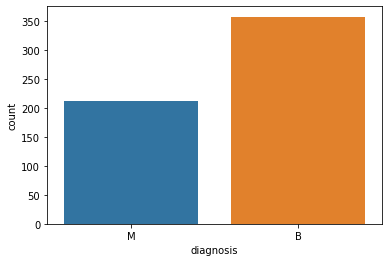

In [ ]:
# Buatlah visualisasi dari features diagnosis
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data["diagnosis"]) # menjumlahkan data dari features diagnosis

In [ ]:
# Tampilkan besarnya korelasi dari setiap features yang ada pada dataset
data.corr # menampilkan besarnya korelasi dari setiap features

<bound method DataFrame.corr of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.277

<ipython-input-19-9e846211408b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


<AxesSubplot:>

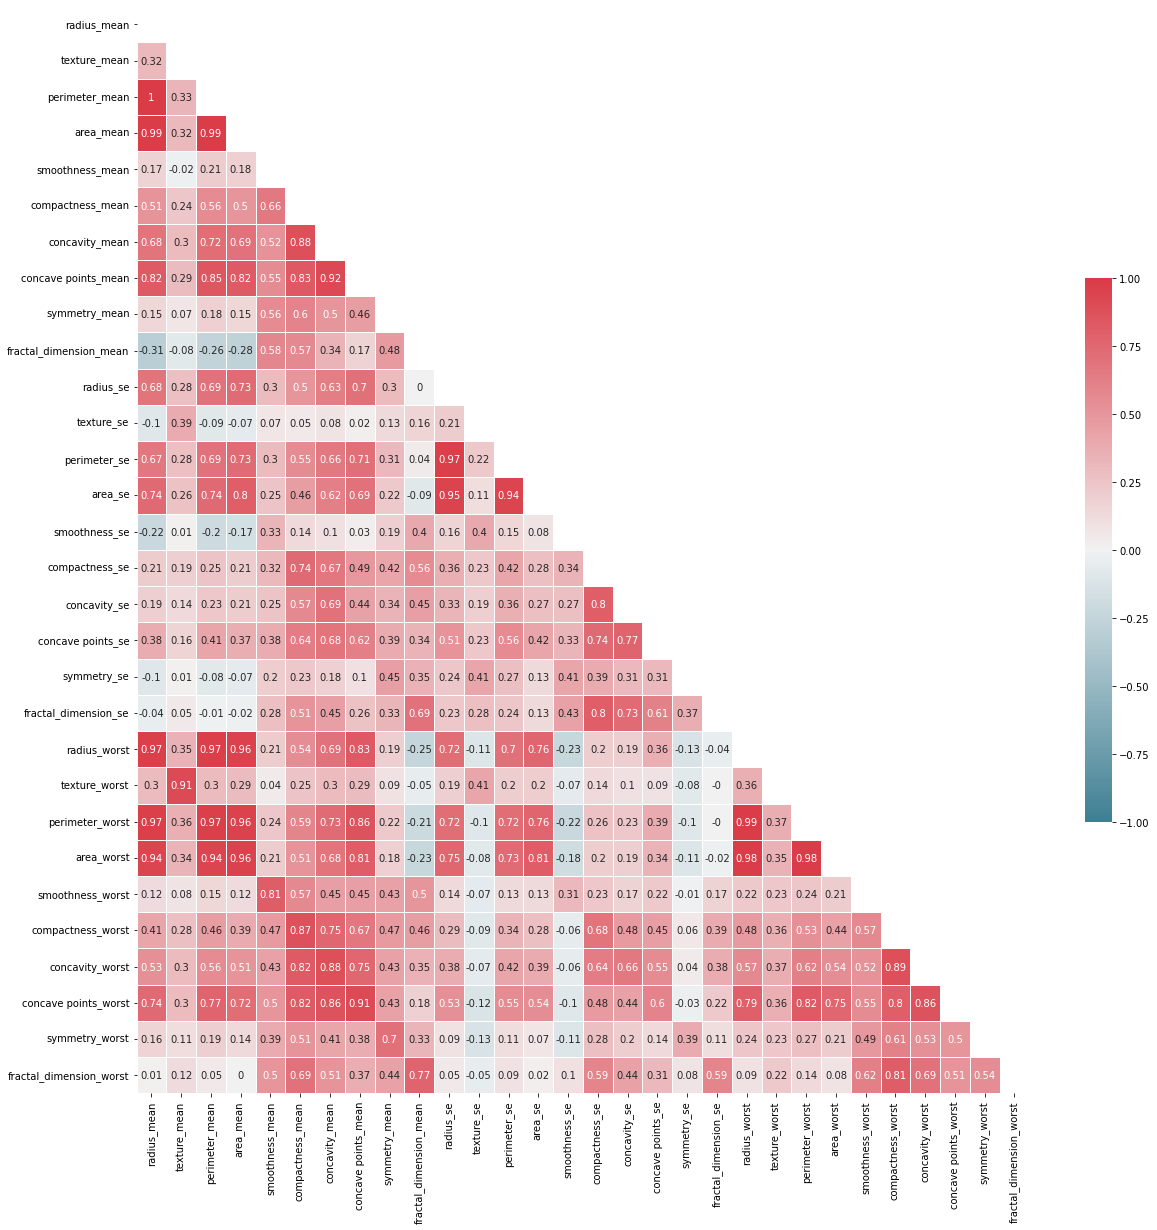

In [ ]:

# Lakukan pembulatan terhadap nilai korelasi dengan menampilkan 2 angka dibelakang koma
corr = data.corr(method = "pearson").round(2) # melakukan pembulatan terhadap nilai korelasi dengan menampilkan 2 angka dibelakang koma
# remove upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True # menghapus segitiga atas

# set figure size
f, ax = plt.subplots(figsize = (20, 20)) # mengatur ukuran gambar
# set colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True) #mengatur peta warna

sns.heatmap(corr, mask = mask, cmap = cmap,
            vmin = -1, vmax = 1, center = 0,
            linewidths = .5, cbar_kws = {"shrink":.5},
            annot = True) # membuat matrixplot

## 3. Data Preprocessing

In [ ]:
# Hapus kolom yang mengandung kata "_worst" (terdapat 10 kolom yang mengandung kata "_worst")
data = data.drop(['radius_worst',
                  'texture_worst',
                  'perimeter_worst',
                  'area_worst',
                  'smoothness_worst',
                  'compactness_worst',
                  'concavity_worst',
                  'concave points_worst',
                  'symmetry_worst',
                  'fractal_dimension_worst'], axis = 1) # menghapus kolom yang mengandung kata "_worst"

In [ ]:
# Tampilkan ukuran data (banyaknya baris dan kolom) terbaru
data.shape # menampilkan ukuran data yang terbaru

(569, 21)

In [ ]:
# Hapus kolom yang mengandung kata "perimeter_" dan "area_"
# (terdapat 2 kolom yang mengandung kata "perimeter_" dan terdapat 2 kolom yang mengandung kata "area_")
data = data.drop(['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se'], axis = 1) # menghapus kolom yang mengandung kata "perimeter_" dan "area_"

In [ ]:
# Tampilkan ukuran data (banyaknya baris dan kolom) terbaru
data.shape # menampilkan ukuran data yang terbaru

(569, 17)

In [ ]:
# Hapus kolom yang mengandung kata "concavity_" dan "concave points_"
# (terdapat 2 kolom yang mengandung kata "concavity_" dan terdapat 2 kolom yang mengandung kata "concave points_")
data = data.drop(['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se'], axis = 1) # menghapus kolom yang mengandung kata "concavity_" dan "concave points_"

In [ ]:
# Tampilkan ukuran data (banyaknya baris dan kolom) terbaru
data.shape #menampilkan ukuran data yang terbaru

(569, 13)

In [ ]:
# Tampilkan 5 data pertama dan 5 data terakhir
data # menampilkan 5 data pertama dan terakhir

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
565,M,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
566,M,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892
567,M,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324,0.006185


In [ ]:
# Ubahlah seluruh nilai pada kolom diagnosis, di mana M menjadi 1 dan B menjadi 0
data["diagnosis"] = data["diagnosis"].map({"M":1, "B":0}) # mengubah M menjadi 1 dan B menjadi 0 pada kolom diagnosis

In [ ]:
# Tampilkan 5 data pertama
data.head() # menampilkan 5 data pertama

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


In [ ]:
# Hitung kemunculan setiap nilai unik yang ada pada kolom diagnosis
data["diagnosis"].value_counts() # menghitung kemunculan setiap nilai unik yang ada

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
# Buatlah variabel x yang isinya sama dengan data (gunakan .copy())
# Hapus kolom diagnosis
# Dapatkan nilai dari setiap elemen yang ada pada variabel x (gunakan .values)
# Tampilkan nilai x
x = data.copy()
x.drop("diagnosis", axis=1, inplace=True)
x = x.values
x #menghapus kolom diagnosis dan mendapatkan nilai dari setiap elemen yang ada

array([[1.799e+01, 1.038e+01, 1.184e-01, ..., 4.904e-02, 3.003e-02,
        6.193e-03],
       [2.057e+01, 1.777e+01, 8.474e-02, ..., 1.308e-02, 1.389e-02,
        3.532e-03],
       [1.969e+01, 2.125e+01, 1.096e-01, ..., 4.006e-02, 2.250e-02,
        4.571e-03],
       ...,
       [1.660e+01, 2.808e+01, 8.455e-02, ..., 3.731e-02, 1.318e-02,
        3.892e-03],
       [2.060e+01, 2.933e+01, 1.178e-01, ..., 6.158e-02, 2.324e-02,
        6.185e-03],
       [7.760e+00, 2.454e+01, 5.263e-02, ..., 4.660e-03, 2.676e-02,
        2.783e-03]])

In [ ]:
# Buatlah variabel y yang berisi nilai pada kolom diagnosis
# Dapatkan nilai dari setiap elemen yang ada pada variabel y (gunakan .values)
# Tampilkan nilai y
y = data["diagnosis"]
y = y.values
y  # mendapatkan nilai dari setiap elemen yang ada

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## 4. Model Evaluation

### 4.1 Logistic Regression

In [ ]:
# Split data menjadi data training sebesar 70% and testing sebesar 30%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 20) # meng-split data menjadi data training dan testing

In [ ]:
# Model Development
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train) # mengembangkan model pada logistic regression

LogisticRegression()

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

print("Accuracy = " + str(accuracy.round(3)))
print("Precision = " + str(precision.round(3)))
print("Recall = " + str(recall.round(3)))
print("F1 = " + str(f1.round(3))) # mengevaluasi model pada logistic regression

Accuracy = 0.906
Precision = 0.859
Recall = 0.887
F1 = 0.873


### 4.2 Neural Network

In [ ]:
# Model Development
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(max_iter = 5000, random_state = 20)
nn.fit(x_train, y_train) # mengembangkan model pada neural network

MLPClassifier(max_iter=5000, random_state=20)

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = nn.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

print("Accuracy = " + str(accuracy.round(3)))
print("Precision = " + str(precision.round(3)))
print("Recall = " + str(recall.round(3)))
print("F1 = " + str(f1.round(3))) # mengevaluasi model pada neural network

Accuracy = 0.942
Precision = 0.953
Recall = 0.897
F1 = 0.924
